In [ ]:
# 區塊 0: 直接從 Roboflow 下載資料集並解壓縮到 Colab 的 /content/ 資料夾中
# (如果選擇執行區塊 0 ，可以直接跳過區塊 1 和區塊 2 ，從區塊 3 開始執行)

In [ ]:
# ============================================
# 掛載 Google Drive
# ============================================
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 資料準備：解壓縮數據集 (.zip)
# ------------------------------------------------------------------------------
import os # 引入 os 模組，用於檔案路徑操作與檢查

# 步驟 2.1: 指定您的壓縮檔案路徑
# 請將 '您的_檔案夾/您的_壓縮檔案.zip' 替換成您在 Google Drive 中的實際路徑
# 注意：'My Drive' 對應 Google Drive 中的 '我的雲端硬碟'
# 範例：zip_file_path = '/content/drive/My Drive/我的資料夾/archive.zip'
zip_file_path = '/content/drive/MyDrive/dataset/My First Project.v2-960-960.yolov8.zip'
print(f"設定壓縮檔案路徑：{zip_file_path}")

# 步驟 2.2: 指定解壓縮的目標路徑
# 通常建議解壓縮到 Colab 環境的 /content/ 目錄下，這樣速度最快。
# 解壓縮到 /content/ 的檔案會在 Colab 會話結束後消失。
# 如果想解壓縮到 Google Drive 中，請修改 destination_path，但通常較慢。
destination_path = '/content/' # 解壓縮到 Colab 的臨時目錄

# 如果您想解壓縮到 Drive 中的特定資料夾，例如：/content/drive/My Drive/解壓縮結果
# destination_path = '/content/drive/My Drive/解壓縮結果/' # 注意：目標資料夾通常會自動創建

print(f"設定解壓縮目標路徑：{destination_path}")


# 步驟 2.3: 執行解壓縮命令
# 使用 ! 可以在 Colab 中執行 shell 命令
# unzip 命令用來解壓縮 .zip 檔案
# -d 選項用來指定解壓縮的目標目錄
# -q 選項表示靜默模式，只顯示錯誤。若想看詳細過程可移除 -q。

print(f"\n嘗試解壓縮檔案：{zip_file_path}")
print(f"至目標路徑：{destination_path}")

# 可選：檢查檔案是否存在，避免執行不存在的檔案導致錯誤
if not os.path.exists(zip_file_path):
    print(f"\n❌ 錯誤：找不到檔案！請檢查檔案路徑是否正確：{zip_file_path}")
    print("請確認：")
    print("1. Google Drive 已成功掛載 (參閱區塊 1 的輸出)。")
    print("2. zip_file_path 變數中的路徑與您在 Drive 中的檔案位置完全符合。")
    print("   例如：'/content/drive/My Drive/你的資料夾/你的檔案.zip'")
else:
    # 構建解壓縮命令
    # 使用雙引號包圍路徑，以正確處理路徑中的空格或特殊字元
    unzip_command = f'unzip -q "{zip_file_path}" -d "{destination_path}"'

    print(f"\n執行解壓縮命令：{unzip_command}")
    # 使用 ! 符號執行 shell 命令
    !{unzip_command}

    print("\n解壓縮命令執行完畢（請查看上方輸出確認是否有錯誤）。")

    # 步驟 2.4: 驗證解壓縮結果 (可選)
    # 列出目標路徑下的檔案，確認解壓縮是否成功或查看解壓縮後的資料夾名稱
    print(f"\n列出目標路徑 {destination_path} 下的檔案/資料夾：")
    !ls {destination_path}
    # 如果您知道解壓縮後會產生哪個資料夾，可以進一步檢查其內容，例如：
    # print(f"\n列出目標路徑 {destination_path}/My First Project.v2-960-960.yolov8 下的內容：")
    # !ls "{destination_path}/My First Project.v2-960-960.yolov8"

設定壓縮檔案路徑：/content/drive/MyDrive/dataset/My First Project.v2-960-960.yolov8.zip
設定解壓縮目標路徑：/content/

嘗試解壓縮檔案：/content/drive/MyDrive/dataset/My First Project.v2-960-960.yolov8.zip
至目標路徑：/content/

執行解壓縮命令：unzip -q "/content/drive/MyDrive/dataset/My First Project.v2-960-960.yolov8.zip" -d "/content/"

解壓縮命令執行完畢（請查看上方輸出確認是否有錯誤）。

列出目標路徑 /content/ 下的檔案/資料夾：
data.yaml  README.dataset.txt	sample_data  train
drive	   README.roboflow.txt	test	     valid


In [ ]:
import os
import shutil

# 建立新資料夾
all_labels_dir = '/content/all_labels1'
os.makedirs(all_labels_dir, exist_ok=True)

# 定義三個來源資料夾
label_dirs = [
    '/content/5_project-1/test/labels',
    '/content/5_project-1/train/labels',
    '/content/5_project-1/valid/labels'
]

# 複製每個資料夾裡的 .txt 標註檔
for dir_path in label_dirs:
    if not os.path.exists(dir_path):
        print(f"❌ 資料夾不存在：{dir_path}")
        continue

    for file_name in os.listdir(dir_path):
        if file_name.endswith(".txt"):
            src_file = os.path.join(dir_path, file_name)
            dst_file = os.path.join(all_labels_dir, file_name)

            # 若目的地已存在同名檔案，可以選擇跳過或覆蓋，這裡預設覆蓋
            shutil.copyfile(src_file, dst_file)

print("✅ 所有標註檔案已複製到：/content/all_labels1")
# ✅ 統計並輸出 all_labels 資料夾內的 .txt 標註檔數量
label_files = [f for f in os.listdir(all_labels_dir) if f.endswith('.txt')]
print(f"✅ 已複製的標註檔案總數：{len(label_files)}")

✅ 所有標註檔案已複製到：/content/all_labels1
✅ 已複製的標註檔案總數：2421


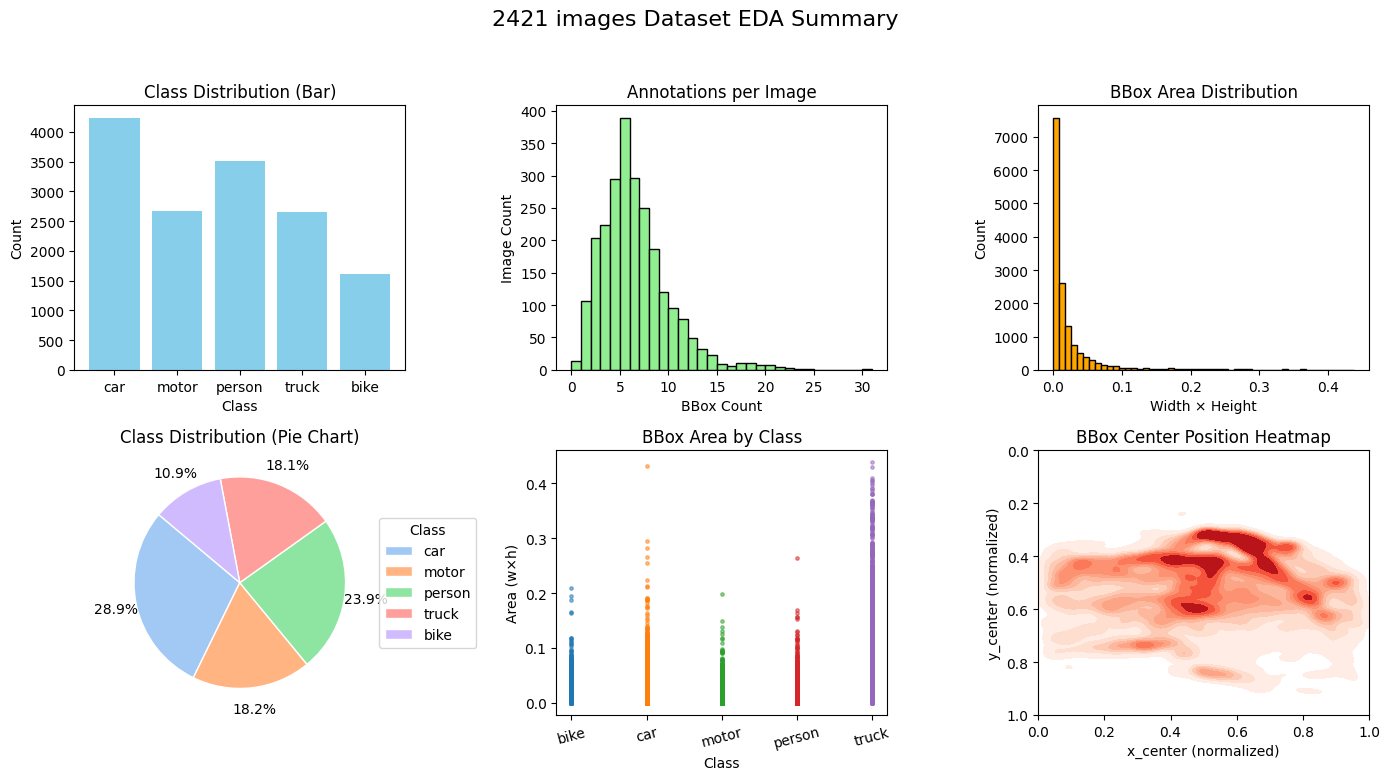

In [ ]:
"""
這是一個針對BDD10K資料集標籤(或其他小批次抽樣資料集)進行的探勘數據分析(EDA)＆圖表視覺化模板
註：資料集標籤需為yolo .txt格式(object detection)

需要更改的地方：
1. label_dir 根據個人雲端資料集實際路徑修改

*可自行增加畫布＆其他視覺化圖表
"""


import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np
import pandas as pd

# ========= 1. 設定標註資料夾路徑（YOLO 格式 .txt） =========
label_dir = '/content/all_labels1'  # ← 根據你的實際路徑修改
assert os.path.exists(label_dir), f"標註資料夾不存在: {label_dir}"


# ========= 2. 類別對應表（class_id ➝ 類別名稱） =========
id2label = {
    0: 'bike',
    1: 'car',
    2: 'motor',
    3: 'person',
    4: 'truck'
}


# ========= 3. 初始化統計容器 =========
class_counter = Counter()
bbox_counts = []
area_list = []
aspect_ratios = []
center_points = []  # ✅ 新增中心點記錄用
class_area_dict = {i: [] for i in id2label.keys()}


# ========= 4. 遍歷每個標註檔案 .txt =========
for file in os.listdir(label_dir):
    if not file.endswith(".txt"):
        continue

    file_path = os.path.join(label_dir, file)
    with open(file_path, "r") as f:
        lines = f.readlines()

    lines = [line.strip() for line in lines if line.strip()]
    bbox_counts.append(len(lines))

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue

        try:
            class_id = int(parts[0])
            x_center, y_center = float(parts[1]), float(parts[2])
            w, h = float(parts[3]), float(parts[4])
        except ValueError:
            continue

        area = w * h
        ratio = w / h if h != 0 else 0

        class_counter[class_id] += 1
        area_list.append(area)
        aspect_ratios.append(ratio)
        class_area_dict[class_id].append(area)

        center_points.append((x_center, y_center))  # ✅ 收集 bbox 中心點


# ========= 5. 建立母圖畫布（2 行 3 列，共 6 子圖） =========
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle("2421 images Dataset EDA Summary", fontsize=16)

# ========= 5-1. 類別分佈長條圖 =========
axs[0, 0].bar([id2label[i] for i in class_counter.keys()], class_counter.values(), color='skyblue')
axs[0, 0].set_title("Class Distribution (Bar)")
axs[0, 0].set_xlabel("Class")
axs[0, 0].set_ylabel("Count")

# ========= 5-2. 每張圖片的標註框數量分佈 =========
axs[0, 1].hist(bbox_counts, bins=range(0, max(bbox_counts)+1), edgecolor='black', color='lightgreen')
axs[0, 1].set_title("Annotations per Image")
axs[0, 1].set_xlabel("BBox Count")
axs[0, 1].set_ylabel("Image Count")

# ========= 5-3. BBox 面積分佈直方圖 =========
axs[0, 2].hist(area_list, bins=50, color='orange', edgecolor='black')
axs[0, 2].set_title("BBox Area Distribution")
axs[0, 2].set_xlabel("Width × Height")
axs[0, 2].set_ylabel("Count")

# ========= 5-4. 類別分佈 Pie Chart =========
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''

labels = [id2label[i] for i in class_counter.keys()]
sizes = list(class_counter.values())
colors = sns.color_palette("pastel")

wedges, texts, autotexts = axs[1, 0].pie(
    sizes,
    labels=None,
    autopct=autopct_format,
    startangle=140,
    colors=colors,
    radius=1,
    wedgeprops=dict(edgecolor='white'),
    pctdistance=1.2
)

axs[1, 0].legend(
    wedges,
    labels,
    title="Class",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
axs[1, 0].set_title("Class Distribution (Pie Chart)")

# ========= 5-5. 類別 vs 面積 散佈圖 =========
for cid, areas in class_area_dict.items():
    axs[1, 1].scatter(
        [id2label[cid]] * len(areas), areas,
        alpha=0.5, s=6, label=id2label[cid]
    )
axs[1, 1].set_title("BBox Area by Class")
axs[1, 1].set_xlabel("Class")
axs[1, 1].set_ylabel("Area (w×h)")
axs[1, 1].tick_params(axis='x', rotation=15)

# ========= 5-6. BBox 中心點 Heatmap =========
df_center = pd.DataFrame(center_points, columns=['x_center', 'y_center'])

sns.kdeplot(
    x=df_center['x_center'],
    y=df_center['y_center'],
    ax=axs[1, 2],
    cmap='Reds',
    fill=True,
    thresh=0.05,
    bw_adjust=0.5
)
axs[1, 2].set_title("BBox Center Position Heatmap")
axs[1, 2].set_xlabel("x_center (normalized)")
axs[1, 2].set_ylabel("y_center (normalized)")
axs[1, 2].set_xlim(0, 1)
axs[1, 2].set_ylim(0, 1)
axs[1, 2].invert_yaxis()

# ========= 6. 調整圖表排版與間距 =========
plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.show()


In [ ]:
"""
這是一個將BDD10K資料集標籤(或其他小批次抽樣資料集)txt > pandas DataFrame格式的模板
格式轉換後可以透過pandas語法進行表格化資料探索

註：資料集標籤需為yolo .txt格式(object detection)

需要更改的地方：
1. label_dir 根據個人雲端資料集實際路徑修改
"""

import os
import pandas as pd

# 標註資料夾
label_dir = '/content/all_labels1' # ← 根據你的實際路徑修改

assert os.path.exists(label_dir), f"標註資料夾不存在: {label_dir}" #檢查路徑是否存在

id2label = {
    0: 'bike',
    1: 'car',
    2: 'motor',
    3: 'person',
    4: 'truck'
}

# 存放結果的 list
records = []

# 讀取每個標註檔
for file in os.listdir(label_dir):
    if not file.endswith(".txt"):
        continue  # 只處理 .txt 結尾的標註檔案（跳過其他檔案）

    file_path = os.path.join(label_dir, file)  # 建立完整檔案路徑
    with open(file_path, "r") as f:
        for line in f.readlines():  # 一行一行讀取標註內容（每行代表一個 bbox）
            parts = line.strip().split()  # 移除換行符號後分割成 list（格式為 class x_center y_center w h）

            class_id = int(parts[0])  # 取得類別 ID
            x_center, y_center, w, h = map(float, parts[1:5])  # 將中心點座標與寬高轉為 float

            area = w * h  # 計算 bbox 面積（相對比例）
            ratio = w / h if h != 0 else 0  # 計算 bbox 長寬比，避免除以 0

            # 建立一筆標註紀錄（轉為 dictionary 格式）
            records.append({
                "filename": file.replace(".txt", ".jpg"),  # 將標註檔轉為對應圖片檔名
                "class_id": class_id,                     # 類別編號
                "class_name": id2label[class_id],         # 類別對應名稱（透過對照表）
                "x_center": x_center,                     # bbox 中心點 X
                "y_center": y_center,                     # bbox 中心點 Y
                "width": w,                               # bbox 寬度
                "height": h,                              # bbox 高度
                "area": area,                             # bbox 面積
                "aspect_ratio": ratio                     # bbox 長寬比
            })

# 轉為 DataFrame
df = pd.DataFrame(records)

# 顯示前幾筆
print(df.head())

# 各類別平均 bbox 面積
print(df.groupby("class_name")["area"].mean())

# 類別數量統計
print(df["class_name"].value_counts())


                                            filename  class_id class_name  \
0  Night-drive-1_mp4-0358_jpg.rf.da21922e6a3b366f...         1        car   
1  Night-drive-1_mp4-0358_jpg.rf.da21922e6a3b366f...         2      motor   
2  Night-drive-1_mp4-0358_jpg.rf.da21922e6a3b366f...         3     person   
3  Night-drive-1_mp4-0358_jpg.rf.da21922e6a3b366f...         3     person   
4  Night-drive-1_mp4-0358_jpg.rf.da21922e6a3b366f...         2      motor   

   x_center  y_center     width    height      area  aspect_ratio  
0  0.466469  0.476736  0.196617  0.286792  0.056388      0.685575  
1  0.759156  0.603764  0.110602  0.202208  0.022365      0.546968  
2  0.861250  0.532194  0.040852  0.307431  0.012559      0.132881  
3  0.662398  0.449750  0.024016  0.173806  0.004174      0.138175  
4  0.072836  0.459403  0.076984  0.133278  0.010260      0.577623  
class_name
bike      0.017880
car       0.019210
motor     0.011298
person    0.012321
truck     0.056102
Name: area, dtype: floa